In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.shape

(962, 2)

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

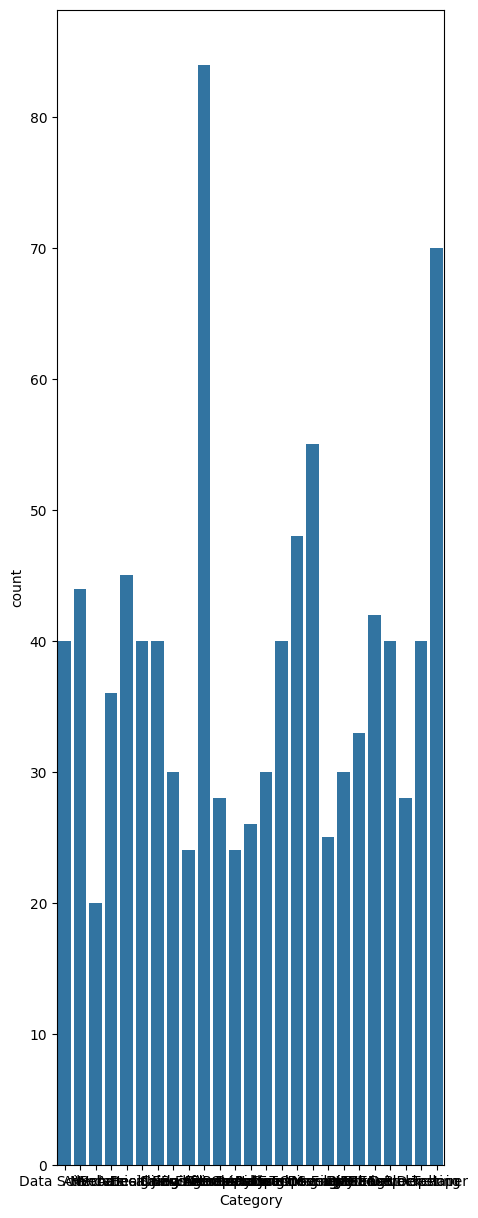

In [13]:
plt.figure(figsize=(5,15))
sns.countplot(x=df['Category']) 
plt.show()

In [14]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

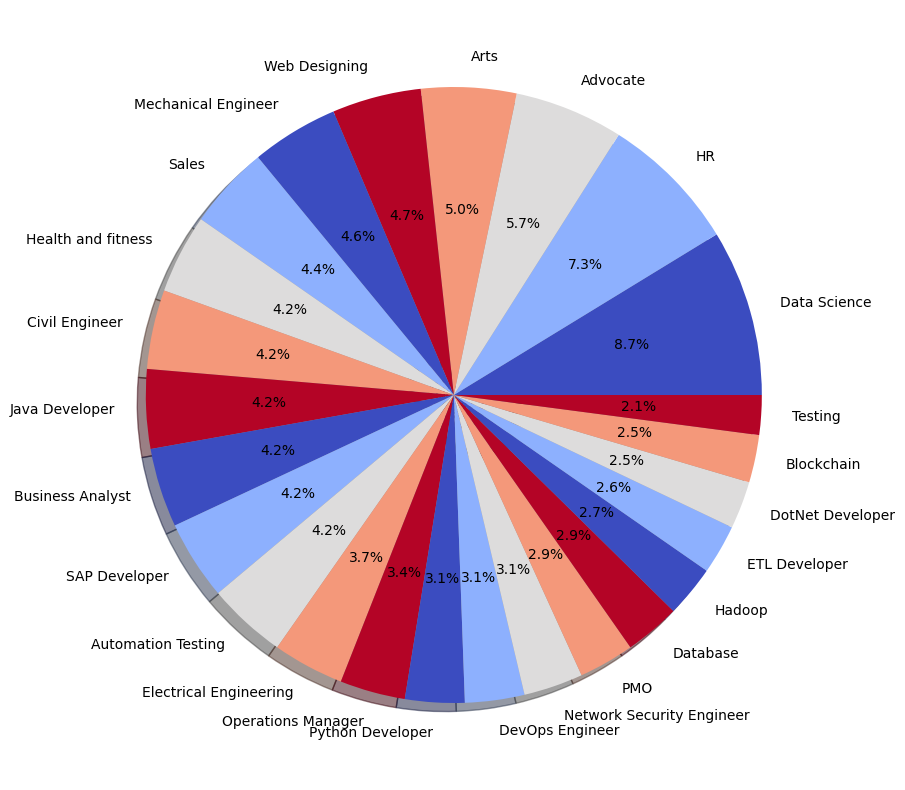

In [31]:
counts = df['Category'].value_counts()
labels =df['Category'].unique()
plt.figure(figsize=(10,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True,colors=plt.cm.coolwarm(np.linspace(0,1,5)))
plt.show()

In [32]:
df['Category'][0]

'Data Science'

In [33]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# cleaning data : 1.urls

In [74]:
import re

def cleanResume(txt):
    # Replace 'RT' or 'cc' with a space
    cleantxt = re.sub(r'\bRT\b|\bcc\b', ' ', txt)
    
    # Remove URLs starting with 'http://'
    cleantxt = re.sub(r'http://\S+', ' ', cleantxt)
    
    # Remove special characters (punctuation and symbols) and '@'
    
    
    # Remove everything from @ onwards (including @)
    cleantxt = re.sub(r'@\S+', ' ', cleantxt)
    
    # Remove hashtags (e.g., #hashtag)
    cleantxt = re.sub(r'#\S+', ' ', cleantxt)
    
    # Remove non-ASCII characters
    cleantxt = re.sub(r'[^\x00-\x7F]+', ' ', cleantxt)
    cleantxt = re.sub(r'\s+',' ',cleantxt)
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    cleantxt = re.sub(r'\s+', ' ', cleantxt).strip()
    cleantxt = re.sub(r'[!"#%&\'()*+,-./:;<=>?@[\]^_`{|}~]+', ' ', cleantxt)
    return cleantxt


In [76]:

# Test the function
print(cleanResume("RT @username: Check this out! http://example.com #Awesome %^&*() \n \r"))


Check this out   


# hashtags


In [88]:
df['Resume'] = df['Resume'].apply(lambda x:cleanResume(x))

# words into categories

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [90]:
le.fit(df['Category'])
df['Category'] =le.transform(df['Category'])

In [91]:
print(df['Category'].unique())

[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]


In [92]:
array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

NameError: name 'array' is not defined

# Vectorization

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requried_text= tfidf.transform(df['Resume'])

In [96]:
requried_text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164120 stored elements and shape (962, 7347)>

# spliting 


In [97]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split( requried_text, df['Category'], test_size=0.2, random_state=42)

In [102]:
X_train.shape

(769, 7347)

In [103]:
X_test.shape

(193, 7347)

## now training the model and printing the classification report

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


# predction system

In [112]:
import pickle

pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [ ]:
myresume =  """Gokul K
				9566259022|gokulaenugu2005@gmail.com|								www.linkedin.com/in/gokul-kishore-042b8028a|The-Gokul-Kishore
Education:
B. Tech												CGPA-9.5 Department: Artificial Intelligence and data science						(2023-27) Chennai Institute of Technology, Chennai, Tamil Nadu
Competitive programming:
Leetcode: 
Contest Rating: 1,523
	Top: 36.74%
	468 problems solved ( 252 easy , 197 medium , 19 hard)
	Rank: 125,750
CodeForces: rating 927
CodeChef: rating 1212
SkillRack:467 problems solved
Coding Ninjas – 2318 contest rating
Projects:
Project 1: NLP_projects (https://github.com/The-Gokul-Kishore/Nlp_projects)
Project 2: Higher Studies Analysis (College Project) (https://github.com/MSDeepak718/HigherStudies)
Project 3: Mistral_PCs (college Project) (https://github.com/The-Gokul-Kishore/Mistral_PCs)
Certifications:
	Networking essentials – Cisco Networking Academy
	Kotlin – meta certification
	Design Thinking for innovation – University of Virginia Daren school of Business Coursera
	-Algorithmic Toolbox – San Deigo university - Coursera
	Intermediate Python 3: Object-Oriented Programming course – codecademy
	Cybersecurity Essentials – CISCO course
	Introduction to Android App development
	Introduction to cybersecurity – CISCO course
Achievements:
-finalist in college level codeathon competition
-School topper in physics
Skills:
1.C/C++   5. HTML	 9. Kotlin	 	13.DSA			12. Tamil
2.Python 6.CSS		10. SQL Lite		14.Python libraires	13.Japanese(N5 completed)
3.Java       7. ReactJs	 11. Networking Basics	(flask ,tensorflow nltk, pandas, NumPy,scikitlearn)	14.Hindi 
"""

In [ ]:
import pickle


clf = pickle.load(open('clf.pkl','rb'))
cleaned_resume = cleanResume(myresume)
input_features = tfidf.transform([cleaned_resume])


In [114]:
category_mapping = {
            15: "Java Developer",
            23: "Testing",
            8: "DevOps Engineer",
            20: "Python Developer",
            24: "Web Designing",
            12: "HR",
            13: "Hadoop",
            3: "Blockchain",
            10: "ETL Developer",
            18: "Operations Manager",
            6: "Data Science",
            22: "Sales",
            16: "Mechanical Engineer",
            1: "Arts",
            7: "Database",
            11: "Electrical Engineering",
            14: "Health and fitness",
            19: "PMO",
            4: "Business Analyst",
            9: "DotNet Developer",
            2: "Automation Testing",
            17: "Network Security Engineer",
            21: "SAP Developer",
            5: "Civil Engineer",
            0: "Advocate",
        }